# Machine learning
## Chapter 8, MNIST FCN classification
## Jun Sup Shin, Digital imaging, GSAIM, CAU

In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
from PIL import Image # for renderling image

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

torch.Size([1000, 784])
<class 'torch.Tensor'>


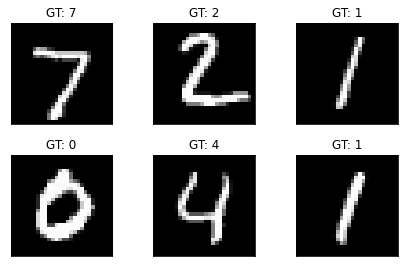

In [9]:
batch_size = 1000
epoches = 10
#  lr ????

# Compose multiple transformation to one(by using list)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: torch.flatten(x)),
    transforms.Lambda(lambda x: x/255.0)
])


# load dataset                  root      is_train_set
train_dataset = datasets.MNIST("./data", train=True, download=True, transform=transform)
test_dataset = datasets.MNIST("./data", train=False, transform=transform)

# utility class to iterate over datasets
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = batch_size)

examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

# load dataset                  root      is_train_set
train_dataset = datasets.MNIST("./data", train=True, download=True, transform=transform)
test_dataset = datasets.MNIST("./data", train=False, transform=transform)

# utility class to iterate over datasets
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = batch_size)

examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

# [batch_size, channel, height, width]
print(example_data.shape)
print(type(example_data))

fig = plt.figure()
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.tight_layout()
    plt.imshow(torch.reshape(example_data[i], (28,28)), cmap='gray', interpolation='none')
    plt.title(f'GT: {example_targets[i]}')
    plt.xticks([])
    plt.yticks([])
fig.show()

In [ ]:
class Net(nn.Module):
    def __init__(self):
        self.fc1 = nn.Linear(784, 16)
        self.fc2 = nn.Linear(16, 10)
    
    def forward(self, x):
        x = self.fc1(x)
        x = F.sigmoid(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [10]:
train_loss = []
test_loss = []

def train(model, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output=model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        print(f'Tran Epoch: {epoch} [{batch_idx}] Loss: {loss.item()}')

def test(model, test_loader):
    model.eval()
    test_loss = 0

SyntaxError: invalid syntax (<ipython-input-10-1cbe2dbfeeb5>, line 12)

In [ ]:
model = Net()
optimizer = optim.Adam(model.parameters(), lr=0.01)
scheduler = StepLR(optimizer, step_size=1, gamma=0.7)

for epoch in range(1, epoches+1):
    train(model, train_loader, optimizer, epoch)
    test(model, test_loader)